<a href="https://colab.research.google.com/github/hasanahaffendy/STQD6234-DataManagement/blob/main/datamanagement_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np
from scipy.interpolate import make_interp_spline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
avg_delay_by_hour_path = '/content/drive/MyDrive/Airplane/avg_delay_by_hour'
avg_delay_by_hour = pd.read_csv(avg_delay_by_hour_path, header=None, names=['Hour', 'AvgDelay'])

avg_delay_by_day_path = '/content/drive/MyDrive/Airplane/avg_delay_by_day'
avg_delay_by_day = pd.read_csv(avg_delay_by_day_path, header=None, names=['DayOfWeek', 'AvgDelay'])

avg_delay_by_month_path = '/content/drive/MyDrive/Airplane/avg_delay_by_month'
avg_delay_by_month = pd.read_csv(avg_delay_by_month_path, header=None, names=['Month', 'AvgDelay'])

avg_delays_path = '/content/drive/MyDrive/Airplane/avg_delays'

cancellation_factors_path = '/content/drive/MyDrive/Airplane/cancellation_factors_labeled'
cancellation_factors = pd.read_csv(cancellation_factors_path, header=None, names=['CancellationCode', 'CancellationCounts'])

**PIG Latin Code**


1.   Extract the hour from the departure time

HOUR_DELAY = FOREACH AIRLINE_DATA GENERATE (int)(DepTime / 100) as Hour, ArrDelay;

2.   Check valid hours (0-23) only

VALID_HOUR_DELAY = FILTER HOUR_DELAY BY (Hour >= 0 AND Hour <= 23);

3.   Group by hour

GROUPED_BY_HOUR = GROUP VALID_HOUR_DELAY BY Hour;

4.   Calculate the average delay per hour

AVG_DELAY_BY_HOUR = FOREACH GROUPED_BY_HOUR GENERATE group as Hour, AVG(VALID_HOUR_DELAY.ArrDelay) as AvgDelay;

5.   Output result

DUMP ORDERED_AVG_DELAY_BY_HOUR;

6.   Store the results

STORE ORDERED_AVG_DELAY_BY_HOUR INTO '/user/maria_dev/airplane/avg_delay_by_hour' USING PigStorage(',');


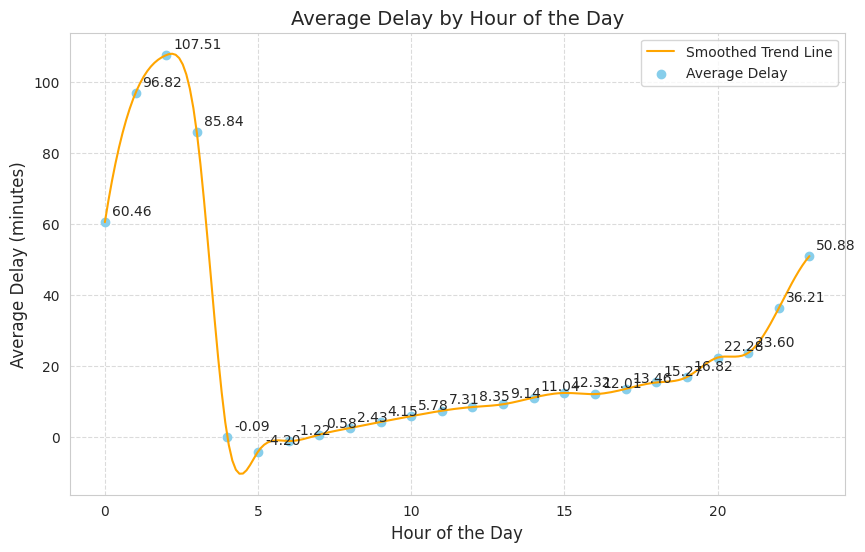

In [ ]:
# Smooth the data for a more visually appealing trend line
spl = make_interp_spline(avg_delay_by_hour['Hour'], avg_delay_by_hour['AvgDelay'], k=3)
hours_smooth = np.linspace(avg_delay_by_hour['Hour'].min(), avg_delay_by_hour['Hour'].max(), 200)
avg_delay_smooth = spl(hours_smooth)

# Plot the data with enhancements
plt.figure(figsize=(10, 6))

# Plot the smoothed trend line
plt.plot(hours_smooth, avg_delay_smooth, color='orange', linestyle='-', label='Smoothed Trend Line')

# Plot the data points with markers
plt.scatter(avg_delay_by_hour['Hour'], avg_delay_by_hour['AvgDelay'], marker='o', color='skyblue', label='Average Delay')

# Add data point annotations
for i, txt in enumerate(avg_delay_by_hour['AvgDelay']):
    plt.annotate(f'{txt:.2f}', (avg_delay_by_hour['Hour'][i], avg_delay_by_hour['AvgDelay'][i]), fontsize=10, xytext=(5, 5), textcoords='offset points')

# Add title and labels
plt.title('Average Delay by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Save the plot as a PNG file
plt.savefig('avg_delay_by_hour_enhanced.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


*   **Hour 0 (midnight)**: Flights departing at midnight have an average delay of approximately 60.46 minutes.
*   **Hour 1 (1:00 AM)**: Flights departing at 1:00 AM have an average delay of around 96.82 minutes.
*   **Hour 2 (2:00 AM)**: Flights departing at 2:00 AM have an average delay of approximately 107.51 minutes.
*   **Hour 3 (3:00 AM)**: Flights departing at 3:00 AM have an average delay of about 85.84 minutes.
*   **Hour 4 (4:00 AM)**: Surprisingly, flights departing at 4:00 AM have a negative average delay of approximately -0.09 minutes. This could indicate that, on average, flights departing at this hour arrive earlier than scheduled.
*   **Hour 5 (5:00 AM)** to **Hour 6 (6:00 AM)**: Flights departing during these hours also have negative average delays, indicating that they tend to arrive earlier than scheduled.
*   **Hour 7 (7:00 AM)**: Flights departing at 7:00 AM have a slight average delay of about 0.58 minutes.
*   **Hour 8 (8:00 AM)** onwards: The average delay gradually increases, reaching its peak at **Hour 23 (11:00 PM)**, with an average delay of approximately 50.88 minutes.

This output provides valuable insights into the variation of flight delays throughout the day, which can be crucial for airline operations and passenger planning.



**PIG Latin Code**


1.   Group by day of the week

GROUPED_BY_DAY = GROUP AIRLINE_DATA BY DayOfWeek;

2.   Calculate the average delay per day

AVG_DELAY_BY_DAY = FOREACH GROUPED_BY_DAY GENERATE group as DayOfWeek, AVG(AIRLINE_DATA.ArrDelay) as AvgDelay;

3.   Order by day of the week

ORDERED_AVG_DELAY_BY_DAY = ORDER AVG_DELAY_BY_DAY BY DayOfWeek ASC;

4.   Output the ordered results

DUMP avg_delay_by_day;

5.   Store the results

STORE ORDERED_AVG_DELAY_BY_DAY INTO '/user/maria_dev/airplane/avg_delay_by_day'



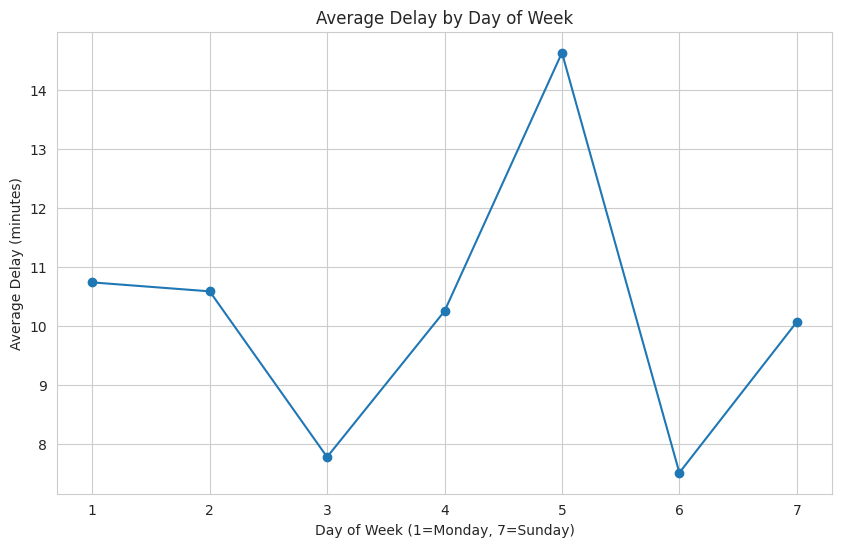

In [ ]:
# Visualize average delay by day of week
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_day['DayOfWeek'], avg_delay_by_day['AvgDelay'], marker='o', linestyle='-')
plt.xlabel('Day of Week (1=Monday, 7=Sunday)')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Day of Week')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

*   **Day 1 (Monday)**: The average delay for flights on Monday is approximately 10.74 minutes.
*   **Day 2 (Tuesday)**: The average delay for flights on Tuesday is approximately 10.58 minutes.
*   **Day 3 (Wednesday)**: The average delay for flights on Wednesday is approximately 7.78 minutes.
*   **Day 4 (Thursday)**: The average delay for flights on Thursday is approximately 10.25 minutes.
*   **Day 5 (Friday)**: The average Friday flight delay is approximately 14.63 minutes.
*   **Day 6 (Saturday)**: The average delay for flights on Saturday is approximately 7.51 minutes.
*   **Day 7 (Sunday)**: The average delay for flights on Sunday is approximately 10.07 minutes.

This output provides insights into the average delay patterns for each day of the week. It indicates that Friday has the highest average. delay, while Wednesday and Saturday have relatively lower average delays. Understanding these patterns can help airlines and travelers plan their journeys more effectively



**PIG Latin Code**


1.   Group by month

GROUPED_BY_MONTH = GROUP AIRLINE_DATA BY Month;

2.   Calculate the average delay per month

AVG_DELAY_BY_MONTH = FOREACH GROUPED_BY_MONTH GENERATE group as Month, AVG(AIRLINE_DATA.ArrDelay) as AvgDelay;

3.   Order by month

ORDERED_AVG_DELAY_BY_MONTH = ORDER AVG_DELAY_BY_MONTH BY Month ASC;

4.   Output the ordered results

DUMP ORDERED_AVG_DELAY_BY_MONTH;

5.   Store the results

STORE ORDERED_AVG_DELAY_BY_MONTH INTO '/user/maria_dev/airplane/ORDERED_AVG_DELAY_BY_MONTH' USING PigStorage(',');



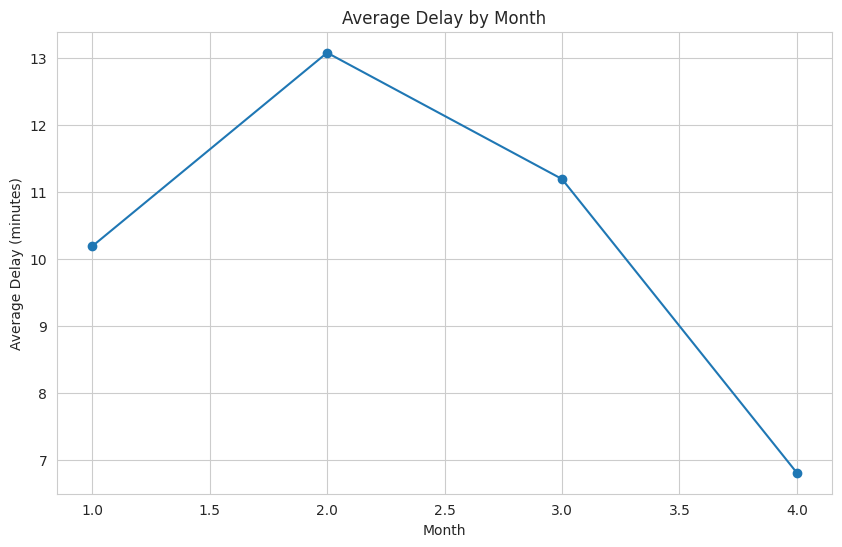

In [ ]:
# Plot average delay by month
plt.figure(figsize=(10, 6))
plt.plot(avg_delay_by_month['Month'], avg_delay_by_month['AvgDelay'], marker='o')
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.savefig('avg_delay_by_month.png')
plt.show()


*   **Month 1**: The average delay is approximately 10.19 minutes.
*  **Month 2**: The average delay is approximately 13.08 minutes.
*   **Month 3**: The average delay is approximately 11.19 minutes.
*   **Month 4**: The average delay is approximately 6.81 minutes.

This output suggests that month 4 has the lowest average delay, while month 2 has the highest average delay among the listed months.


**PIG Latin Code**


1.   Filter for non-cancelled flights

ontime_flights = FILTER AIRLINE_DATA BY Cancelled == 0;

2.   Calculate average delay for each factor

GROUPED_BY_MONTH = GROUP ON_TIME_FLIGHTS BY Month;

avg_delays = FOREACH (GROUP ontime_flights ALL)
    GENERATE
        'CarrierDelay' AS DelayType1,
        AVG(ontime_flights.CarrierDelay) AS AvgCarrierDelay,
        'WeatherDelay' AS DelayType2,
        AVG(ontime_flights.WeatherDelay) AS AvgWeatherDelay,
        'NASDelay' AS DelayType3,
        AVG(ontime_flights.NASDelay) AS AvgNASDelay,
        'SecurityDelay' AS DelayType4,
        AVG(ontime_flights.SecurityDelay) AS AvgSecurityDelay,
        'LateAircraftDelay' AS DelayType5,
        AVG(ontime_flights.LateAircraftDelay) AS AvgLateAircraftDelay;

3.   Output the average delays with labels

DUMP avg_delays;

4.   Store the results

STORE avg_delays INTO '/user/maria_dev/airplane/avg_delays' USING PigStorage(',');




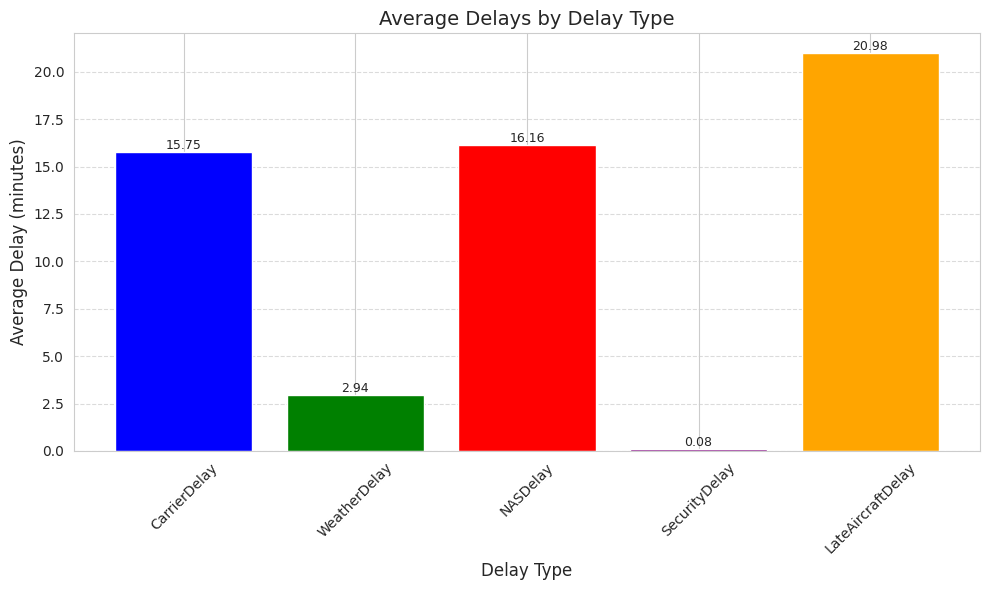

In [ ]:
# Read the data from the file into a DataFrame
with open(avg_delays_path, 'r') as file:
    data = file.read()

# Convert the data to a dictionary
data_list = data.split(',')
data_dict = {data_list[i]: float(data_list[i+1]) for i in range(0, len(data_list), 2)}

# Plotting the data with enhancements
plt.figure(figsize=(10, 6))

# Define colors for each delay type
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot the bar chart
bars = plt.bar(avg_delays['DelayType'], avg_delays['AvgDelay'], color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=9)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add title and labels
plt.title('Average Delays by Delay Type', fontsize=14)
plt.xlabel('Delay Type', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


The output provides the average delay for different factors contributing to flight delays. Here's an explanation of each part of the output:

1.   CarrierDelay: Carrier-related issues, such as maintenance, crew scheduling, or aircraft cleaning. The average carrier delay is about 15.75 minutes.
2.   A weather delay is the average delay resulting from weather-related factors such as thunderstorms, fog, or lightning. The average weather delay is about 2.94 minutes.
3.   NASDelay: NAS is an acronym for National Airspace System. Air traffic control, airport operations, and airspace congestion cause NAS delays. The average NAS delay is about 16.16 minutes.
4.  SecurityDelay: Typically, security-related issues such as breaches, screening procedures, or security alerts cause this average delay. The average security delay is about 0.08 minutes.
5.   The LateAircraftDelay represents the average delay resulting from the aircraft's delayed arrival from the preceding flight. The average late aircraft delay is about 20.98 minutes.

Each delay type provides information about the factors contributing to flight delays. By analysing these averages, airlines and airport authorities can identify areas for improvement and develop strategies to reduce delays caused by each factor.

**PIG Latin Code**


1.   Filter for cancelled flights

cancelled_flights = FILTER AIRLINE_DATA BY Cancelled == 1;

2.   Group cancelled flights by CancellationCode and count occurrences

cancellation_counts = GROUP cancelled_flights BY CancellationCode;

3.   Calculate the count of cancelled flights for each cancellation code

cancellation_factors = FOREACH cancellation_counts GENERATE
    group AS CancellationCode,
    COUNT(cancelled_flights) AS CancellationCount;

4.   Replace the cancellation codes with descriptions

cancellation_factors_labeled = FOREACH cancellation_factors GENERATE
    (CASE
        WHEN CancellationCode == 'A' THEN 'carrier'
        WHEN CancellationCode == 'B' THEN 'weather'
        WHEN CancellationCode == 'C' THEN 'NAS'
        WHEN CancellationCode == 'D' THEN 'security'
        ELSE 'Unknown'
    END) AS CancellationReason,
    CancellationCount;



5.   Output the cancellation statistics with descriptive labels

DESCRIBE cancellation_factors_labeled;

DUMP cancellation_factors_labeled;

STORE cancellation_factors_labeled INTO '/user/maria_dev/airplane/cancellation_factors_labeled' USING PigStorage(',');



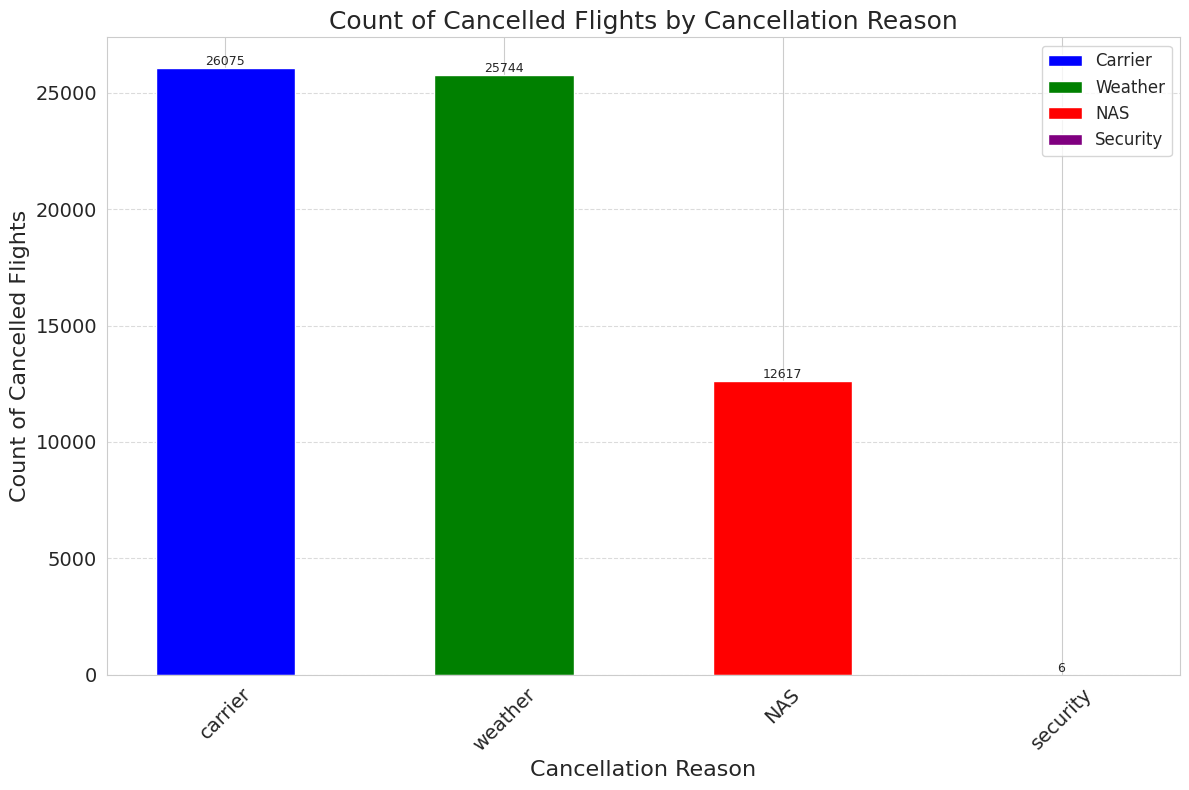

In [ ]:
# Plotting with further enhancements
plt.figure(figsize=(12, 8))  # Increase figure size

# Define colors and labels for each cancellation reason
colors = ['blue', 'green', 'red', 'purple']
labels = ['Carrier', 'Weather', 'NAS', 'Security']

# Plot the bar chart with improved aesthetics
bars = plt.bar(cancellation_factors['CancellationCode'], cancellation_factors['CancellationCounts'], color=colors, width=0.5)

# Add data labels on top of each bar with custom formatting
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', va='bottom', ha='center', fontsize=9)

# Add legend
plt.legend(bars, labels, loc='upper right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add title and labels with larger fonts
plt.title('Count of Cancelled Flights by Cancellation Reason', fontsize=18)
plt.xlabel('Cancellation Reason', fontsize=16)
plt.ylabel('Count of Cancelled Flights', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Adjust y-axis labels font size
plt.yticks(fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


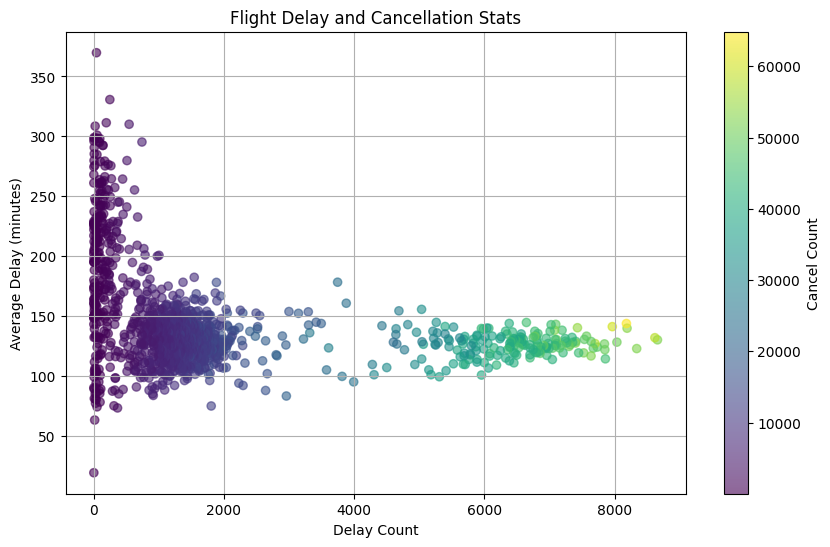

In [ ]:
# Plot flight delay stats
plt.figure(figsize=(10, 6))
plt.scatter(flight_delay_stats['DelayCount'], flight_delay_stats['AvgDelay'], c=flight_delay_stats['CancelCount'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cancel Count')
plt.title('Flight Delay and Cancellation Stats')
plt.xlabel('Delay Count')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.savefig('flight_delay_stats.png')
plt.show()